In [45]:
import pandas as pd

In [46]:
mp = pd.read_csv('trainRF.csv')

In [47]:
mp.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [48]:
mp.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [49]:
mp.select_dtypes(include='object').columns

Index([], dtype='object')

### Sampling

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
mp_train, mp_test = train_test_split(mp,test_size=0.2)

In [52]:
mp_train_x = mp_train.iloc[ : , :-1]
mp_train_y = mp_train.iloc[ : , -1]

In [53]:
mp_test_x = mp_test.iloc[ : , :-1]
mp_test_y = mp_test.iloc[ : , -1]

### Model building

In [54]:
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier

In [108]:
dt = DecisionTreeClassifier(criterion="entropy",max_depth=3)

In [109]:
dt.fit(mp_train_x,mp_train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

### Prediction

In [110]:
pred_dt = dt.predict(mp_test_x)
pred_dt

array([2, 3, 1, 1, 1, 2, 0, 2, 3, 2, 3, 0, 1, 3, 3, 3, 3, 0, 1, 1, 2, 2,
       1, 2, 2, 0, 2, 1, 2, 2, 1, 0, 1, 2, 2, 3, 2, 3, 1, 1, 0, 3, 1, 2,
       1, 2, 3, 3, 2, 2, 0, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 2, 3, 1, 3, 3,
       1, 1, 1, 3, 1, 0, 1, 2, 0, 3, 2, 0, 1, 0, 2, 1, 0, 3, 0, 0, 0, 0,
       3, 2, 0, 2, 2, 3, 1, 2, 1, 3, 2, 0, 2, 0, 3, 3, 0, 2, 1, 3, 2, 2,
       3, 1, 2, 0, 0, 3, 1, 0, 1, 3, 3, 0, 3, 2, 3, 1, 0, 1, 0, 3, 1, 3,
       1, 3, 0, 0, 2, 1, 3, 2, 3, 0, 3, 1, 0, 2, 2, 1, 2, 0, 1, 2, 3, 0,
       0, 3, 3, 1, 1, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 3, 1, 2, 3, 3, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 3, 1, 2, 1, 0, 0, 0, 0, 0, 0,
       3, 0, 2, 3, 1, 3, 1, 0, 3, 3, 1, 1, 2, 0, 1, 0, 2, 2, 0, 0, 0, 2,
       2, 0, 2, 1, 3, 3, 0, 0, 0, 1, 1, 0, 1, 1, 3, 0, 1, 1, 0, 0, 3, 2,
       2, 2, 1, 0, 3, 3, 1, 1, 3, 1, 1, 3, 3, 1, 3, 2, 3, 3, 1, 1, 1, 3,
       0, 1, 1, 3, 1, 1, 0, 3, 0, 0, 1, 2, 0, 2, 0, 3, 2, 1, 2, 2, 1, 3,
       1, 3, 0, 3, 3, 2, 3, 3, 2, 1, 2, 0, 3, 2, 1,

### Confusion Matrics

In [111]:
from sklearn.metrics import confusion_matrix

In [112]:
tab = confusion_matrix(mp_test_y,pred_dt)
tab

array([[79, 27,  0,  0],
       [15, 65,  9,  0],
       [ 0, 23, 64, 16],
       [ 0,  0, 16, 86]], dtype=int64)

### Accuracy

In [113]:
Accuracy = tab.diagonal().sum()*100/tab.sum()
Accuracy 

73.5

### Important Features

In [114]:
dt.feature_importances_

array([0.05510977, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01802157, 0.92686866, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [115]:
dt.feature_importances_.sum()

0.9999999999999999

In [116]:
mp_train_x.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [117]:
feat_imp_df = pd.DataFrame()
feat_imp_df['Features'] = mp_train_x.columns
feat_imp_df['Imp'] = dt.feature_importances_

In [118]:
feat_imp_df.sort_values('Imp',ascending=False)

,Features,Imp
13,ram,0.926869
0,battery_power,0.055110
12,px_width,0.018022
1,blue,0.000000
18,touch_screen,0.000000
17,three_g,0.000000
16,talk_time,0.000000
15,sc_w,0.000000
14,sc_h,0.000000
11,px_height,0.000000


### Tree

In [39]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [119]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot
from IPython.display import Image 
from six import StringIO


In [26]:
conda install graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\MR.GODHADE\anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |       he04af86_2         1.5 MB
    expat-2.4.9                |       h6c2663c_0         207 KB
    fribidi-1.0.10             |       h62dcd97_0          63 KB
    getopt-win32-0.1           |       h2bbff1b_0          19 KB
    glib-2.69.1                |       h5dc1a3c_1         1.6 MB
    graphite2-1.3.14           |       hd77b12b_1          91 KB
    graphviz-2.50.0            |       hdb8b0d4_0         903 KB
    gts-0.7.6                  |       h63ab5a1_3         181 KB
    harfbuzz-4.3.0             |       hb646838_1         855 KB
    libffi-3.4.4               |       hd77b12b_0         113 KB
    libgd-2.3.3                |       ha43c60c_



==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda




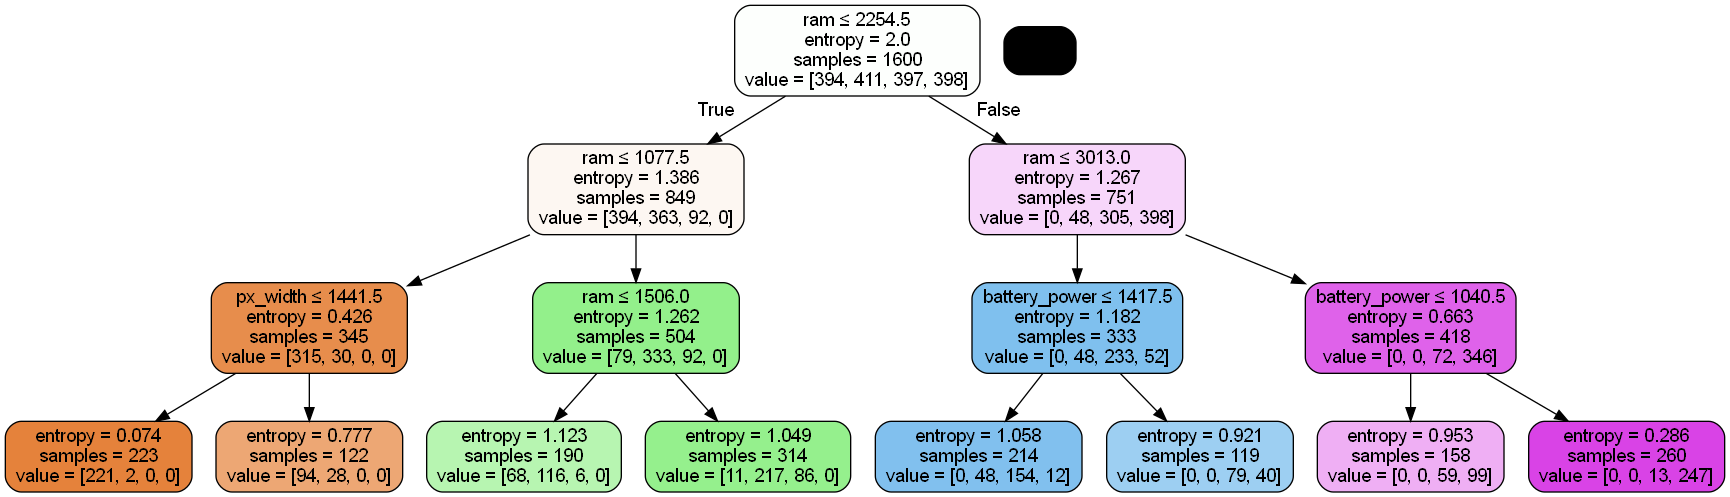

<Figure size 1200x1200 with 0 Axes>

In [120]:
dot_data = StringIO()  ## creating a empty  file 
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(12,12))

export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True , feature_names=mp_train_x.columns  )
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Conclusion

### RAM is the most important features to select mobile

### Then Battery power, px_width and so on..